In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('../Adilabad.csv')
print(df.shape)
df

(84, 4)


,Date,PM10,NOx,SO2
0,01-01-2016,62.0,14.0,3.0
1,01-02-2016,68.0,14.0,3.0
2,01-03-2016,71.0,14.0,3.0
3,01-04-2016,70.0,14.5,3.5
4,01-05-2016,69.0,15.0,3.5
...,...,...,...,...
79,01-08-2022,56.0,26.2,8.5
80,01-09-2022,54.0,27.5,9.7
81,01-10-2022,62.0,29.3,10.9
82,01-11-2022,58.0,26.4,7.5


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

69   2021-01-10
70   2021-01-11
71   2021-01-12
72   2022-01-01
73   2022-01-02
74   2022-01-03
75   2022-01-04
76   2022-01-05
77   2022-01-06
78   2022-01-07
79   2022-01-08
80   2022-01-09
81   2022-01-10
82   2022-01-11
83   2022-01-12
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:4]
print(cols)

['PM10', 'NOx', 'SO2']


<AxesSubplot:>

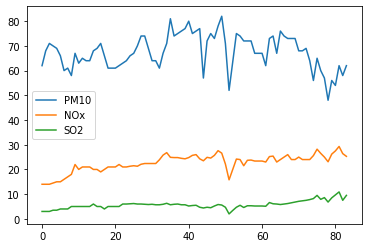

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,PM10,NOx,SO2
0,62.0,14.0,3.0
1,68.0,14.0,3.0
2,71.0,14.0,3.0
3,70.0,14.5,3.5
4,69.0,15.0,3.5
...,...,...,...
79,56.0,26.2,8.5
80,54.0,27.5,9.7
81,62.0,29.3,10.9
82,58.0,26.4,7.5


In [ ]:
n_future = 12
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
    trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])

In [ ]:
trainX, trainYP, trainYN, trainYS = np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))

trainX shape == (70, 3, 3).
trainYP shape == (70, 1).
trainYN shape == (70, 1).
trainYS shape == (70, 1).


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 11s 441ms/step - loss: 0.9037 - val_loss: 3.0138
Epoch 2/200
4/4 [==============================] - 0s 43ms/step - loss: 0.8957 - val_loss: 3.0770
Epoch 3/200
4/4 [==============================] - 0s 36ms/step - loss: 0.8864 - val_loss: 3.1312
Epoch 4/200
4/4 [==============================] - 0s 39ms/step - loss: 0.8690 - val_loss: 3.1853
Epoch 5/200
4/4 [==============================] - 0s 38ms/step - loss: 0.8664 - val_loss: 3.2595
Epoch 6/200
4/4 [==============================] - 0s 42ms/step - loss: 0.8604 - val_loss: 3.3294
Epoch 7/200
4/4 [==============================] - 0s 32ms/step - loss: 0.8452 - val_loss: 3.4022
Epoch 8/200
4/4 [==============================] - 0s 56ms/step - loss: 0.8426 - val_loss: 3.4885
Epoch 9/200
4/4 [==============================] - 0s 53ms/step - loss: 0.8283 - val_loss: 3.5798
Epoch 10/200
4/4 [==============================] - 0s 50ms/step - loss: 0.8128 - val_loss: 3.6932
Epoch 11/200
4/4 

In [ ]:
historyP = history

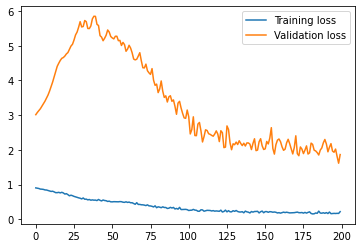

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predict_period_dates = pd.date_range(start = '01-01-2023',periods=12, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


In [ ]:
predictionP = modelP.predict(trainX[:12])

1/1 [==============================] - 0s 388ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecastP = pd.DataFrame({'Date':np.array(forecast_dates), 'PM10':y_pred_futureP})
df_forecastP['Date']=pd.to_datetime(df_forecastP['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='PM10'>

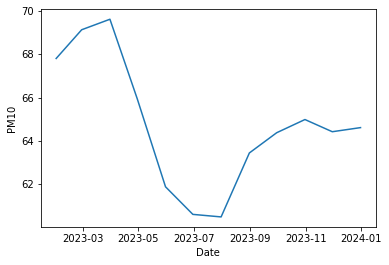

In [ ]:
sns.lineplot(df_forecastP['Date'], df_forecastP['PM10'])

In [ ]:
df_forecastP

,Date,PM10
0,2023-01-31,67.808495
1,2023-02-28,69.136688
2,2023-03-31,69.622345
3,2023-04-30,65.941620
4,2023-05-31,61.876568
5,2023-06-30,60.601357
6,2023-07-31,60.484032
7,2023-08-31,63.440235
8,2023-09-30,64.376526
9,2023-10-31,64.986038


In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 5s 140ms/step - loss: 0.4735 - val_loss: 1.2377
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4629 - val_loss: 1.1925
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4485 - val_loss: 1.1527
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4334 - val_loss: 1.1008
Epoch 5/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4236 - val_loss: 1.0387
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4068 - val_loss: 0.9772
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3870 - val_loss: 0.9078
Epoch 8/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3752 - val_loss: 0.8241
Epoch 9/200
4/4 [==============================] - 0s 15ms/step - loss: 0.3613 - val_loss: 0.7413
Epoch 10/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3410 - val_loss: 0.6666
Epoch 11/200
4/4 [

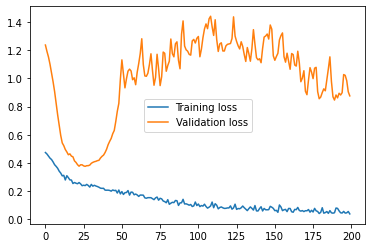

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX[:12])

1/1 [==============================] - 0s 428ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
df_forecastN = pd.DataFrame({'Date':np.array(forecast_dates), 'NOx':y_pred_futureN})
df_forecastN['Date']=pd.to_datetime(df_forecastN['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='NOx'>

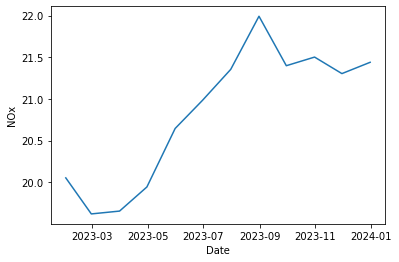

In [ ]:
sns.lineplot(df_forecastN['Date'], df_forecastN['NOx'])

In [ ]:
df_forecastN

,Date,NOx
0,2023-01-31,20.053122
1,2023-02-28,19.620817
2,2023-03-31,19.654764
3,2023-04-30,19.944103
4,2023-05-31,20.645937
5,2023-06-30,20.983461
6,2023-07-31,21.355152
7,2023-08-31,21.992601
8,2023-09-30,21.399076
9,2023-10-31,21.502619


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 4s 135ms/step - loss: 0.5182 - val_loss: 4.8020
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5140 - val_loss: 4.8190
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5127 - val_loss: 4.8496
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5079 - val_loss: 4.8692
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5085 - val_loss: 4.8844
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5038 - val_loss: 4.8894
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4975 - val_loss: 4.9023
Epoch 8/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4973 - val_loss: 4.9136
Epoch 9/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4932 - val_loss: 4.9050
Epoch 10/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4955 - val_loss: 4.9092
Epoch 11/200
4/4 [

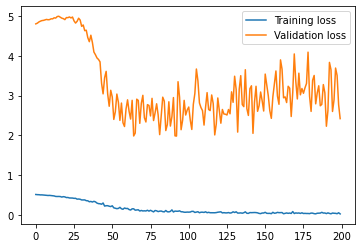

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX[:12])

1/1 [==============================] - 0s 359ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
df_forecastS = pd.DataFrame({'Date':np.array(forecast_dates), 'SO2':y_pred_futureS})
df_forecastS['Date']=pd.to_datetime(df_forecastS['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='SO2'>

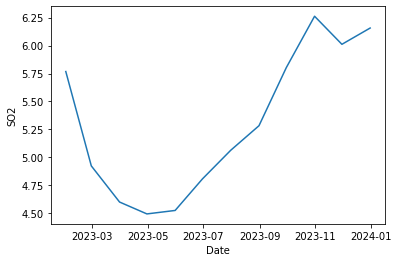

In [ ]:
sns.lineplot(df_forecastS['Date'], df_forecastS['SO2'])

In [ ]:
df_forecastS

,Date,SO2
0,2023-01-31,5.767825
1,2023-02-28,4.923544
2,2023-03-31,4.600196
3,2023-04-30,4.493875
4,2023-05-31,4.524870
5,2023-06-30,4.807523
6,2023-07-31,5.063400
7,2023-08-31,5.283008
8,2023-09-30,5.803204
9,2023-10-31,6.262522


In [ ]:
frames = [df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]]

In [ ]:
result = pd.concat([df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]], axis=1)

In [ ]:
result

,Date,PM10,NOx,SO2
0,2023-01-31,67.808495,20.053122,5.767825
1,2023-02-28,69.136688,19.620817,4.923544
2,2023-03-31,69.622345,19.654764,4.600196
3,2023-04-30,65.941620,19.944103,4.493875
4,2023-05-31,61.876568,20.645937,4.524870
5,2023-06-30,60.601357,20.983461,4.807523
6,2023-07-31,60.484032,21.355152,5.063400
7,2023-08-31,63.440235,21.992601,5.283008
8,2023-09-30,64.376526,21.399076,5.803204
9,2023-10-31,64.986038,21.502619,6.262522


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/LSTM Adilabad AQI.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  result.to_csv(f)

Mounted at /content/drive
